# Graded Challenge 1
Muhammad Ikhsan Rahman Hakim - FTDS001

The dataset used is **Uber vs Lyft** dataset from kaggle. It contains trip transaction from these two big online tranportation company. It also included the corresponding weather data for that hour with a short summary of the weather, temperature, wind, and sunset.

We want to try make a Linear Regression Model from it, and see the compatibility between the two.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

## Data Loading

In [3]:
df = pd.read_csv('rideshare_kaggle.csv')

In [4]:
print('Dimension of the dataset:', df.shape)
df.head(5)

Dimension of the dataset: (693071, 57)


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [5]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

## Data Cleaning

Drop some data that might be not related to price.

In [7]:
#drop columns
new_df = df.drop(['id','timestamp','long_summary','latitude','longitude','windGustTime','temperatureHigh',
                  'temperatureHighTime','temperatureLow','temperatureLowTime','apparentTemperatureHighTime','apparentTemperatureHigh',
                  'apparentTemperatureLowTime','apparentTemperatureLow','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                  'temperatureMaxTime','apparentTemperatureMinTime','apparentTemperatureMaxTime','ozone',
                  'moonPhase','icon','uvIndex'],axis = 1)
print(new_df.shape)

(693071, 32)


In [8]:
#detect missing value from every columns
new_df.isnull().sum().sort_values(ascending=False)

price                     55095
hour                          0
precipProbability             0
apparentTemperatureMin        0
temperatureMax                0
temperatureMin                0
precipIntensityMax            0
visibility.1                  0
cloudCover                    0
windBearing                   0
pressure                      0
dewPoint                      0
visibility                    0
windGust                      0
windSpeed                     0
humidity                      0
precipIntensity               0
day                           0
short_summary                 0
apparentTemperature           0
temperature                   0
surge_multiplier              0
distance                      0
name                          0
product_id                    0
cab_type                      0
destination                   0
source                        0
timezone                      0
datetime                      0
month                         0
apparent

In [9]:
# Drop any rows with null values
new_df.dropna(axis=0, how='any', inplace=True)

In [10]:
new_df['datetime'] = pd.to_datetime(new_df['datetime'])

In [11]:
new_df.head()

,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,...,dewPoint,pressure,windBearing,cloudCover,visibility.1,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
0,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,...,32.70,1021.98,57,0.72,10.000,0.1276,39.89,43.68,33.73,38.07
1,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,...,41.83,1003.97,90,1.00,4.786,0.1300,40.49,47.30,36.20,43.92
2,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,...,31.10,992.28,240,0.03,10.000,0.1064,35.36,47.55,31.04,44.12
3,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,...,26.64,1013.73,310,0.00,10.000,0.0000,34.67,45.03,30.30,38.53
4,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,...,28.61,998.36,303,0.44,10.000,0.0001,33.10,42.18,29.11,35.75


# Exploratory Data Analysis (EDA)

Let's see how "Price" data distributed.

Price mean:  16.545125490614065


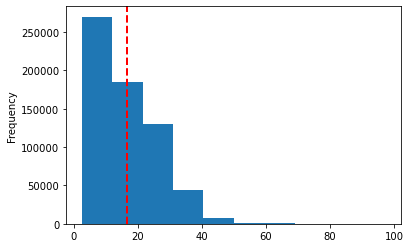

In [53]:
new_df['price'].plot.hist(bins=10)
plt.axvline(new_df['price'].mean(), color='red', linestyle='dashed', linewidth=2)
print("Price mean: ",new_df['price'].mean())

Let's take a shortcut with .describe() to summarized our dataset statistic.

In [12]:
new_df.describe()

,hour,day,month,price,distance,surge_multiplier,temperature,apparentTemperature,precipIntensity,precipProbability,...,dewPoint,pressure,windBearing,cloudCover,visibility.1,precipIntensityMax,temperatureMin,temperatureMax,apparentTemperatureMin,apparentTemperatureMax
count,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.00000,637976.000000,637976.000000,...,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000,637976.000000
mean,11.618528,17.797674,11.586550,16.545125,2.189261,1.015068,39.582406,35.87844,0.008909,0.145941,...,31.652281,1010.092744,220.112705,0.686291,8.469180,0.037369,33.456171,45.259945,29.729028,41.995876
std,6.948776,9.982083,0.492452,9.324359,1.135413,0.095422,6.725500,7.91726,0.026880,0.328776,...,9.141390,13.475580,99.087172,0.358599,2.601828,0.055216,6.466349,5.644414,7.109907,6.935538
min,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,18.910000,12.13000,0.000000,0.000000,...,4.390000,988.090000,2.000000,0.000000,0.717000,0.000000,15.630000,33.510000,11.810000,28.950000
25%,6.000000,13.000000,11.000000,9.000000,1.270000,1.000000,36.450000,31.91000,0.000000,0.000000,...,27.490000,999.820000,124.000000,0.370000,8.432000,0.000000,30.170000,42.570000,27.760000,36.570000
50%,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,40.490000,35.90000,0.000000,0.000000,...,30.690000,1009.250000,258.000000,0.820000,9.880000,0.000400,34.240000,44.660000,30.130000,40.950000
75%,18.000000,28.000000,12.000000,22.500000,2.930000,1.000000,43.580000,40.01000,0.000000,0.000000,...,38.120000,1021.860000,303.000000,1.000000,9.996000,0.091600,38.880000,46.910000,35.710000,44.120000
max,23.000000,30.000000,12.000000,97.500000,7.860000,3.000000,57.220000,57.22000,0.144700,1.000000,...,50.670000,1035.550000,356.000000,1.000000,10.000000,0.145900,43.100000,57.870000,40.050000,57.200000


In [54]:
# see all new edited dataset columns
new_df.columns

Index(['hour', 'day', 'month', 'datetime', 'timezone', 'source', 'destination',
       'cab_type', 'product_id', 'name', 'price', 'distance',
       'surge_multiplier', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'dewPoint', 'pressure',
       'windBearing', 'cloudCover', 'visibility.1', 'precipIntensityMax',
       'temperatureMin', 'temperatureMax', 'apparentTemperatureMin',
       'apparentTemperatureMax'],
      dtype='object')

In [55]:
# check data correlation with price column
new_df[feature_cols+['price']].corr()

,distance,precipIntensity,visibility,windGust,cloudCover,price
distance,1.000000,-0.000512,0.004143,0.000920,-0.000958,0.345061
precipIntensity,-0.000512,1.000000,-0.600613,0.197778,0.288915,0.000166
visibility,0.004143,-0.600613,1.000000,0.038898,-0.477676,0.001497
windGust,0.000920,0.197778,0.038898,1.000000,0.104673,0.001218
cloudCover,-0.000958,0.288915,-0.477676,0.104673,1.000000,0.000883
price,0.345061,0.000166,0.001497,0.001218,0.000883,1.000000


We can see that Distance is the most correlated with Price.

<AxesSubplot:>

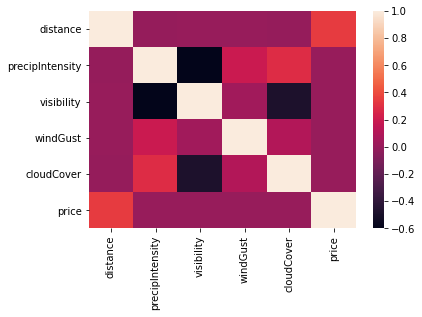

In [56]:
sns.heatmap(new_df[feature_cols+['price']].corr())

# Data Transformation

Choose columns that related with Price, statistically.

In [44]:
feature_cols = ['distance','precipIntensity','visibility','windGust','cloudCover']
X = new_df[feature_cols]
y = new_df['price']

# Modelling

### Data Scaling

In [58]:
scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

### Splitting Data

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)

# Train model

In [61]:
model = LinearRegression(fit_intercept=False)
model.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

# Model Inference

The inference is the stage in which a trained model is used to infer/predict the testing samples and comprises of a similar forward pass as training to predict the values.

In [64]:
# y_pred stands for 'y prediction' because we want to predict y value
y_pred = model.predict(X_test)
y_pred

array([-1.25873623,  0.32893875, -3.67114392, ..., -4.45794169,
        1.25234072,  2.68379235])

Let's see difference between our prediction with y_test.

In [66]:
gap = y_test - y_pred

<AxesSubplot:>

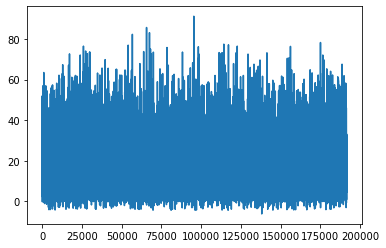

In [67]:
gap.reset_index(drop=True).plot()

From here we can see a huge gap between our prediction with the data test.

So, we can say that our prediction is not good because it's far from the real test data (y_test).

#### Let's try to plot this so we can see the difference.

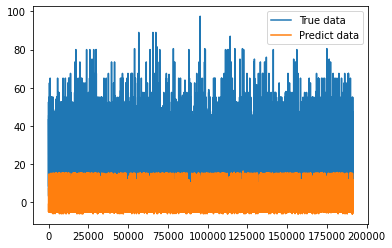

In [79]:
fig,ax = plt.subplots() #make canvas plot

plt.rcParams['agg.path.chunksize'] = 10000
y_test_reset = y_test.reset_index(drop=True)

ax.plot(y_test_reset.index.values, y_test, label='True data')
ax.plot(y_test_reset.index.values, predict, label='Predict data')
plt.legend()

# Conclusion

Linear Regression model isn't compatible with this dataset. We need to change our model because the prediction is not close to the real data.